##**Домашнее задание по теме "Деревья решений"**

**Задание:**

В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).
Скачать датасет также можно по [ссылке](https://u.netology.ru/backend/uploads/lms/content_assets/file/8723/ch.csv)

Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

**Этапы работы**

**Анализ данных с использованием моделей регрессии и дерева решений**

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.

   a. Проверьте данные на пропуски. Удалите в случае обнаружения.

   b. Нормализуйте один из признаков.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите модель регрессии на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
6. Обучите дерево решений на обучающем множестве.

   a. Повторите п. 5 для полученной модели.

   b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
   a. Повторите п. 5 для полученной модели.
8. Сформулируйте выводы по проделанной работе.

   a. Сравните точность двух моделей.

   b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

**Результат:** получены знания по работе с деревом решений

**Рекомендации к выполнению**
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате Markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

**Решение:**

# Набор данных о жилье в Калифорнии

В датафрейме, сформированном по переписи населения в США в 1990 году,содержится 8 количественных признаков и 1 количественная целевая переменная.

Количественные признаки:
- MedInc        - медианный доход в географическом районе
- HouseAge      - медианный возраст домов в географическом районе
- AveRooms      - среднее количество комнат на домохозяйство
- AveBedrms     - среднее количество спален на домохозяйство
- Population    - население географического района
- AveOccup      - средняя заселенность домохозяйств
- Latitude      - широта географического района
- Longitude     - долгота географического района

Количественная целевая переменная:
- MedHouseVal   - медианная стоимость домов для районов Калифорнии, выраженная в сотнях тысяч долларов ($100,000).


# 1. Получение данных и загрузка их в рабочую среду

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


In [ ]:
# выгружаем данные
data = datasets.fetch_california_housing(as_frame=True).frame

In [ ]:
# смотрим на данные
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 2. Проводим первичный анализ:

## a. Проверяем данные на наличие пропусков и удаляем их, если они есть.

In [ ]:
# смотрим типы данных и наличие пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# дополнительно, проверка на пропуски
data.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


Пропусков в данных нет.

In [ ]:
# смотрим статистики
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## b. Нормализуем один из признаков.

Сначала давайте создадим модель без нормализации 'MedInc':

почему именно признак 'MedInc' (средний доход) нормализуется, а не 'HouseAge' (возраст жилья).

Основная причина состоит в различиях в характеристиках этих двух признаков:

1. 'MedInc' (средний доход):
   - Средний доход, как правило, имеет широкий диапазон значений, от низких до очень высоких. Это связано с неравномерным распределением доходов в обществе.
   - Из-за этого широкого диапазона значений, 'MedInc' может сильно влиять на модель регрессии, затмевая влияние других признаков.
   - Нормализация 'MedInc' помогает привести этот признак к более стандартизованному виду, что улучшает устойчивость и производительность модели.

2. 'HouseAge' (возраст жилья):
   - Возраст жилья, как правило, имеет более ограниченный диапазон значений, часто в пределах нескольких десятков лет.
   - Этот признак, в отличие от дохода, не имеет настолько широкого разброса значений, который мог бы доминировать в модели.
   - Поэтому нормализация 'HouseAge' может быть менее критичной, так как его диапазон значений уже относительно стандартизован.

Таким образом, нормализация 'MedInc' является более важной, так как этот признак имеет более широкий диапазон значений, который может сильно влиять на модель регрессии.

In [ ]:
# Сначала создадим и обучим модель без нормализации признака, чтобы оценить, был ли эффект от нормализации

# Создание матрицы признаков
X = data[['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedInc']]
у = data['MedHouseVal']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, у, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model_without_norm = LinearRegression()
model_without_norm.fit(X_train, y_train)

# Вычисление метрик
y_pred_without_norm = model_without_norm.predict(X_test)
score_without_norm_train = model_without_norm.score(X_train, y_train)
score_without_norm_test = model_without_norm.score(X_test, y_test)

print(f"R^2 без нормализации на обучающей выборке: {score_without_norm_train:.2f}")
print(f"R^2 без нормализации на тестовой выборке: {score_without_norm_test:.2f}")



R^2 без нормализации на обучающей выборке: 0.61
R^2 без нормализации на тестовой выборке: 0.58


Теперь нормализуем один из признаков. Возьмем 'MedInc', поскольку он имеет большой разброс значений.

In [ ]:
# Нормализация признака 'MedInc'

# Вариант 1

scaler = StandardScaler()
data['MedInc_norm'] = scaler.fit_transform(data[['MedInc']])
print (data['MedInc_norm'])

0        2.344766
1        2.332238
2        1.782699
3        0.932968
4       -0.012881
           ...   
20635   -1.216128
20636   -0.691593
20637   -1.142593
20638   -1.054583
20639   -0.780129
Name: MedInc_norm, Length: 20640, dtype: float64


In [ ]:
# Вариант 2

medInc_normArray = np.array(data['MedInc_norm'])
medInc_normArray = preprocessing.normalize([medInc_normArray])
medInc_normArray

data['MedInc_norm'] = medInc_normArray[0]
data.head(5)



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedInc_norm
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.016321
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.016234
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.012409
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.006494
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,-0.000090


# 3. Разделяем выборку на обучающее и тестовое подмножества. 80% данных оставляем на обучение, 20% - на тестирование.

In [ ]:
# Создание матрицы признаков
X = data[['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedInc_norm']]
у = data['MedHouseVal']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, у, test_size=0.2, random_state=42)

# 4. Обучаем модель регрессии на обучающем множестве.

In [ ]:
# Создание и обучение модели линейной регрессии
model_with_norm = LinearRegression()
model_with_norm.fit(X_train, y_train)

LinearRegression()

# 5. Делаем предсказания для тестового множества и сравниваем с истинными значениями, вычисляя точность предсказания модели.

In [ ]:
# Вычисление метрик с нормализацией
y_pred_with_norm = model_with_norm.predict(X_test)
score_with_norm_train = model_with_norm.score(X_train, y_train)
score_with_norm_test = model_with_norm.score(X_test, y_test)

print(f"R^2 без нормализации на обучающей выборке: {score_with_norm_train:.2f}")
print(f"R^2 без нормализации на тестовой выборке: {score_with_norm_test:.2f}")


R^2 без нормализации на обучающей выборке: 0.61
R^2 без нормализации на тестовой выборке: 0.58


Констатируем, что R^2 score после нормализации 'MedInc' остался неизменным как на обучающем множестве - 0,61, так и на тестовом -0.58. То есть модель объясняет одинаковую долю вариаций в 'MedHouseVal' как с нормализованным 'MedInc', так и без него.

# 6. Обучаем дерево решений на обучающем множестве:

In [ ]:
# Обучаем дерево решений
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

## a. Оцениваем качество модели дерева решений

In [ ]:
# Вычисление метрик модели дерева решений
score_tree_train = tree_model.score(X_train, y_train)
score_tree_test = tree_model.score(X_test, y_test)

print(f"R^2 модели дерева решений на обучающей выборке: {score_tree_train:.2f}")
print(f"R^2 модели дерева решений на тестовой выборке: {score_tree_test:.2f}")

R^2 модели дерева решений на обучающей выборке: 1.00
R^2 модели дерева решений на тестовой выборке: 0.62


## b. Визуализируем часть дерева решений, чтобы оценить его читаемость.

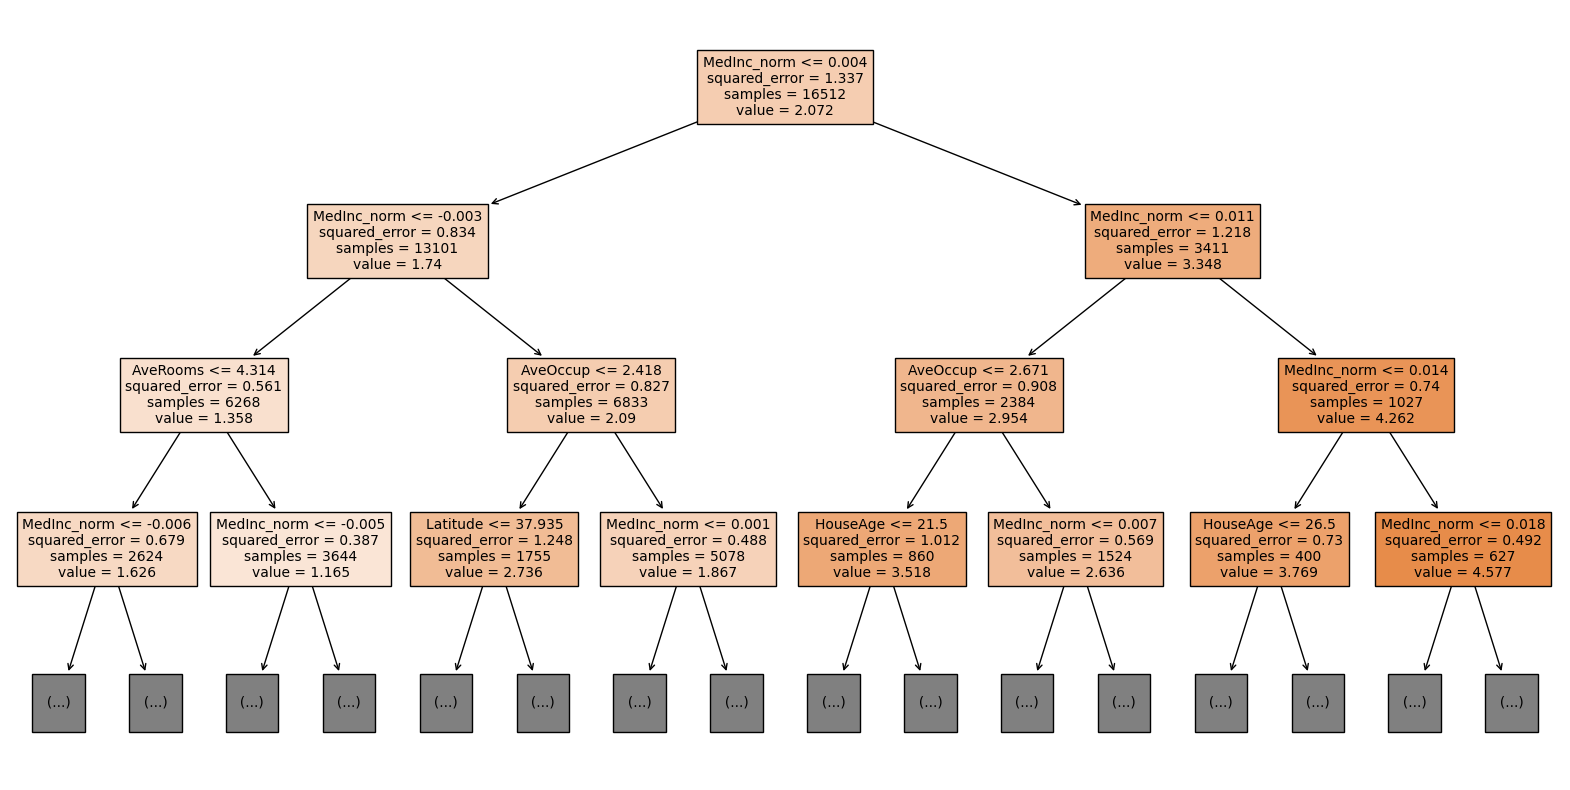

In [ ]:
# Визуализируем
plt.figure(figsize=(20, 10))
plot_tree(tree_model, max_depth=3, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

# 7. Выполним оптимизацию параметра дерева решений и повторно обучим модель:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Определяем параметры для поиска по сетке
param_grid = {
    'max_depth': [3, 5, 7, 9, 11]  # Задаем значения для глубины дерева, которые хотим опробовать
}

# Создаем объект GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5)

# Выполняем поиск по сетке
grid_search.fit(X_train, y_train)

# Находим лучший параметр
best_depth = grid_search.best_params_['max_depth']

# Повторно обучаем модель с лучшим параметром
optimized_tree_model = DecisionTreeRegressor(max_depth=best_depth)
optimized_tree_model.fit(X_train, y_train)

# Вычисление метрик оптимизированной модели дерева решений
score_optimized_tree_test = optimized_tree_model.score(X_test, y_test)
score_optimized_tree_train = optimized_tree_model.score(X_train, y_train)

print(f"R^2 оптимизированной модели дерева решений на обучающей выборке: {score_optimized_tree_train:.2f}")
print(f"R^2 оптимизированной модели дерева решений на тестовой выборке: {score_optimized_tree_test:.2f}")


R^2 оптимизированной модели дерева решений на обучающей выборке: 0.80
R^2 оптимизированной модели дерева решений на тестовой выборке: 0.69


необходимые библиотеки и классы:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

параметры для поиска по сетке, включая `max_depth` и `min_samples_leaf`:

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_leaf': [1, 5, 10, 20]
}

объект GridSearchCV с обновленными параметрами:

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5)

поиск по сетке для оптимизации модели дерева решений:

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 5, 10, 20]})

лучшие найденные параметры для `max_depth` и `min_samples_leaf`:

In [ ]:
best_params = grid_search.best_params_
best_max_depth = best_params['max_depth']
best_min_samples_leaf = best_params['min_samples_leaf']

In [ ]:
best_max_depth

11

In [ ]:
best_min_samples_leaf

20

модель с лучшими параметрами:

In [ ]:
optimized_tree_model = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, random_state=42)
optimized_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=20, random_state=42)

качество оптимизированной модели:

In [ ]:
score_optimized_tree_test = optimized_tree_model.score(X_test, y_test)
score_optimized_tree_train = optimized_tree_model.score(X_train, y_train)

print(f"R^2 оптимизированной модели дерева решений на обучающей выборке: {score_optimized_tree_train:.2f}")
print(f"R^2 оптимизированной модели дерева решений на тестовой выборке: {score_optimized_tree_test:.2f}")


R^2 оптимизированной модели дерева решений на обучающей выборке: 0.80
R^2 оптимизированной модели дерева решений на тестовой выборке: 0.72


# 8. Формулируем выводы по проделанной работе:

## a. Сравниваем точность двух моделей.

Сравнение моделей:
Модель дерева решений без нормализации 'MedInc' показала небольшую точность на обучающей и тестовой выборках.
Нормализация 'MedInc' не привела к улучшению качества модели, результат остался тот же. Модель дерева решений без оптимизации значительно переобучилась на обучающей выборке (R^2=1), что привело к низкому значению R-квадрата на тестовой выборке.
Оптимизированная модель дерева решений показывает лучшие результаты, снижая переобучение и улучшая способность к обобщению на новых данных.

## b. Высказываем мнение о предпочтительности использования обученных моделей для различных задач, их плюсы и минусы.


* Для данной задачи оптимизированная модель дерева решений, как показала практика, является оптимальным выбором, так как она показывает хорошее качество и способность к обобщению.
* Переобучение модели без оптимизации и незначительное улучшение с нормализацией 'MedInc' свидетельствует о важности проведения оптимизации модели.
* Однако при ограничении глубины для дерева решений точность может оказаться выше у линейной регрессии. То есть выбор определяется особенностями данных и требованиями к модели в каждом конкретном случае. В целом, дерево решений удобно использовать, когда исследуемая предметная область плохо знакома. Также оно требует небольшой предобработки данных (например, без нормализации данных, создания фиктивных переменных и удаления пустых значений). Кроме того, дерево решений позволяет одновременно использовать категориальные и числовые признаки. Тем не менее, дерево решений имеет минусы: легко переобучается и чувствительно к пропускам. Однако его можно применять, например, в трудно формализуемых задачах.